In [105]:
# Importing the libraries
import numpy as np
from matplotlib import pyplot as plt
from scipy.signal import chirp, spectrogram
import pywt
import pandas as pd

Question 1

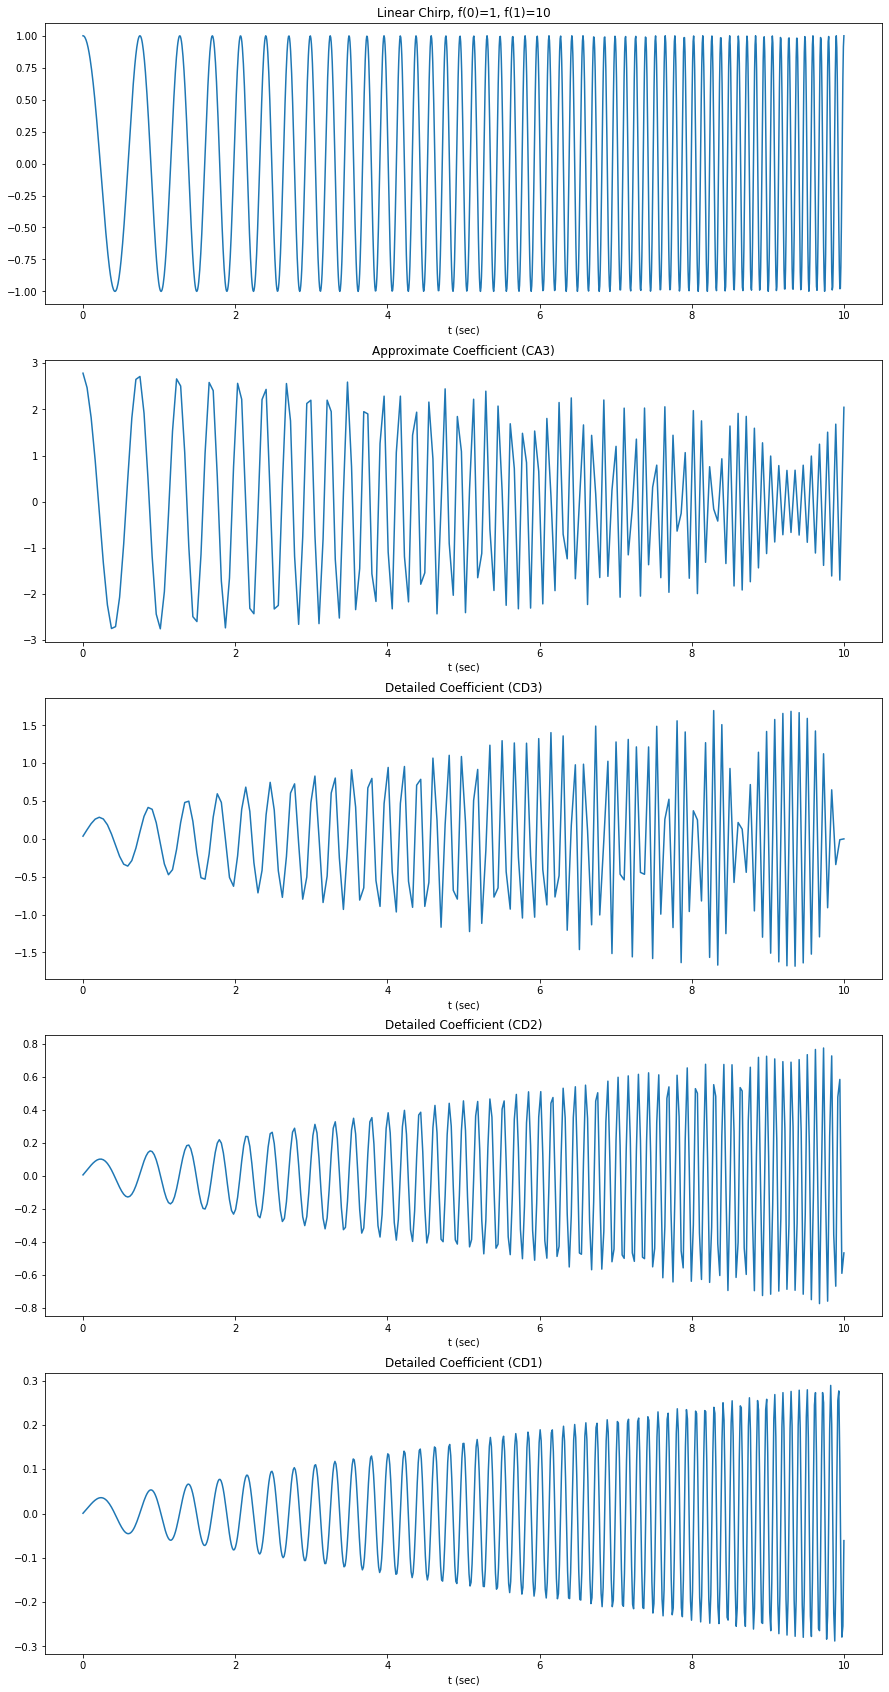

In [152]:
# Generating a real chirp signal
t = np.linspace(0, 10, 1500) # Definning time interval
x = chirp(t, f0=1, f1=10, t1=10) # Generating chirp signal with frequencies 6 and 1 Hz
# Plotting the chirp signal

fig = plt.figure(figsize=(15,30)) # Definning figure

plt.subplot(5,1,1)
plt.plot(t, x)
plt.title("Linear Chirp, f(0)=1, f(1)=10")
plt.xlabel('t (sec)')

coeffs = pywt.wavedec(x,'haar',mode='sym',level=3) # Computiing Discrete Wavelet Transform with haar wavelet, mode as symmetric and for 3 levels

t = np.linspace(0,10,len(coeffs[0])) # Definning time for coefficients of differnt sizes
plt.subplot(5,1,2)
plt.plot(t,coeffs[0])
plt.title('Approximate Coefficient (CA3)')
plt.xlabel('t (sec)')

for i in range(1,len(coeffs)):
    t = np.linspace(0,10,len(coeffs[i])) # Definning time for coefficients of differnt sizes
    plt.subplot(5,1,i+2)
    plt.plot(t,coeffs[i])
    plt.title('Detailed Coefficient (CD' +str(4-i)+')')
    plt.xlabel('t (sec)')

plt.show()

Question 2

[array([  0.44027459,   0.20209916,   0.1924637 ,   0.25391136,
         0.33212552,   0.30163101,   0.08491827,   0.43409695,
         0.        ,   5.00870471,  13.29435153,  19.23412139,
        21.91516396,  21.34566716,  17.29850452,  11.22019708,
         1.8234434 ,  -4.13604831, -21.20115483, -30.52507868,
       -33.03960029, -32.50353731, -28.59886934, -22.53220705,
       -13.41706925,  -4.73520002,   1.98342424,   7.43971602,
        10.78462872,  10.30768408,   4.64703366,   2.22396585,
         1.31136587,  -5.26151071, -13.59843517, -18.79900047,
       -22.25258596, -21.13653489, -17.39424335, -10.9161217 ,
        -1.91101869,   0.11147008]), array([ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.48538046, -0.22800611,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        

ValueError: Unexpected detail coefficient type: <class 'numpy.ndarray'>. Detail coefficients must be a dicionary of arrays as returned by wavedecn. If you are using pywt.array_to_coeffs or pywt.unravel_coeffs, please specify output_format='wavedecn'

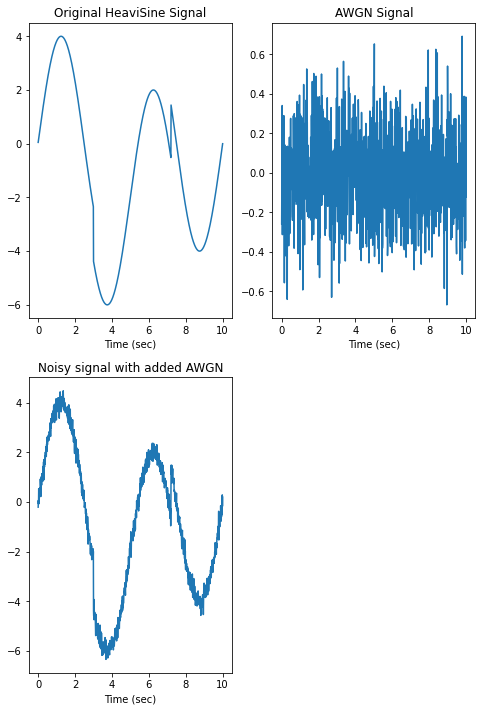

In [169]:
t = np.linspace(0,10,1024)
heavisine = pywt.data.demo_signal('HeaviSine', 1024) # Generating HeaviSine signal
n_t = np.random.normal(0, 0.22, 1024) # Generating AWGN noise

x_t = heavisine + n_t # Generating noise signal

# Definning the adaptive threshold value
def lam_j(j):
    return 0.54/np.log(j+2)

fig = plt.figure(figsize=(8,25))

plt.subplot(4,2,1)
plt.plot(t,heavisine)
plt.xlabel('Time (sec)')
plt.title('Original HeaviSine Signal')

plt.subplot(4,2,2)
plt.plot(t,n_t)
plt.xlabel('Time (sec)')
plt.title('AWGN Signal')

plt.subplot(4,2,3)
plt.plot(t,x_t)
plt.xlabel('Time (sec)')
plt.title('Noisy signal with added AWGN')

# Decomposing using the wavelet coefficients
coeffs = pywt.wavedec(x_t,'db6',mode='sym',level=5) # Computiing Discrete Wavelet Transform with Daubechies 6 wavelet, mode as symmetricand for 5 levels

# Universal constant threshold lamba proposed by Donoho and Johnston
lam = 0.54

coeffs_p = []
for i in range(len(coeffs)):
    w = []
    for j in range(len(coeffs[i])):
        # Applying the Soft-threshold function
        if abs(coeffs[i][j]) < lam:
            w.append(0)
        else:
            w.append(np.sign(coeffs[i][j])*(abs(coeffs[i][j])-lam))
    coeffs_p.append(np.array(w))    

print(coeffs_p)

coeffs_p = []
for i in range(len(coeffs)):
    coeffs_p.append(pywt.threshold(coeffs[i], 0.54, 'soft'))
    
print(coeffs_p)
    
y_t = pywt.waverecn(coeffs_p, wavelet='db6',mode='sym')

Question 3

Text(0.5, 1.0, 'Reconstructed Signal')

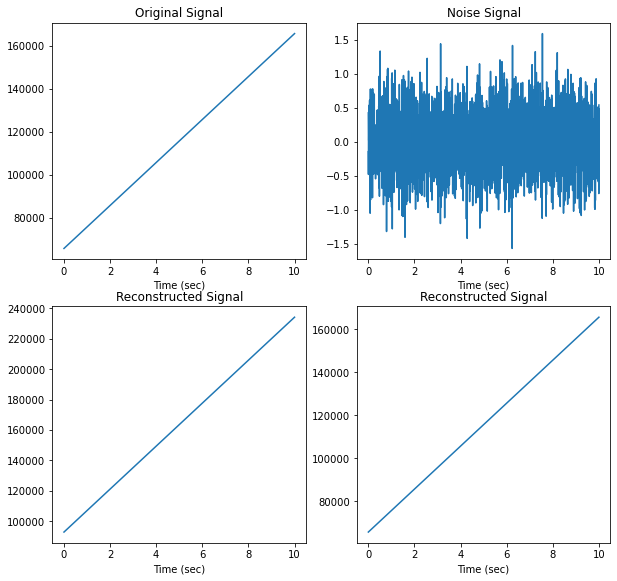

In [157]:
# Reading csv file
df = pd.read_csv('acc_00001.csv',header=None)

# Extraing the last column in to list
s = df.iloc[:,[3]].values
n = df.iloc[:,[-1]].values

x = s+n

t = np.linspace(0,10,len(x))

fig = plt.figure(figsize=(10,20))

plt.subplot(4,2,1)
plt.plot(t,x)
plt.xlabel('Time (sec)')
plt.title('Original Signal')

plt.subplot(4,2,2)
plt.plot(t,n)
plt.xlabel('Time (sec)')
plt.title('Noise Signal')

cA, cD = pywt.dwt(list(x), 'haar', 'smooth')

x_p = pywt.idwt(cA, cD, 'haar', 'smooth')

plt.subplot(4,2,3)
plt.plot(t,cA)
plt.xlabel('Time (sec)')
plt.title('Reconstructed Signal')

window = 3
cumsum = np.cumsum(np.insert(x, 0, 0))
y_t = (cumsum[window:] - cumsum[:-window]) / float(window)

t = np.linspace(0,10,len(y_t))

plt.subplot(4,2,4)
plt.plot(t,y_t)
plt.xlabel('Time (sec)')
plt.title('Reconstructed Signal')